<a href="https://colab.research.google.com/github/suntan-fruits/colab_notebooks/blob/master/Pima_Indians_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pima Indians Diabetes


### What is k-NN(k-Nearest Neighbors) Prediction?
**KNN Classification** is one of the methods to determine unknown results based on the given dataset. This algorithm orginated from the idea that similar data tend to cluster together. By checking the distance to each data point of the training dataset, it chooses the k-most nearest data, which is referred to as "k-Nearest Neighbors". Then it returns the most common outcome among the k-Nearest Neighbors as the final prediction.

* Import modules

To begin with, we have to import some modules.


In [0]:
import pandas as pd
data = pd.read_csv("diabetes.csv")

import matplotlib.pyplot as plt
import seaborn as sns

* Check the data

Firstly, check the data and overview it. There are three options you can choose.

1.   `.sample()` 
2.   `.head()` 
3.   `.tail()`

In [0]:
data.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
166,3,148,66,25,0,32.5,0.256,22,0
374,2,122,52,43,158,36.2,0.816,28,0
735,4,95,60,32,0,35.4,0.284,28,0


`data.columns` shows each column's name  which are chosen for the possible determinant of the outcome.

In [0]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

* Check whether the data is biased

It's not proper to use biased data since our model can yield inaccurate predictions. For this reason, we always should check it. Generally if one side of outcome is higher than three times of the other side, it's perceived as biased data.
We can count numbers of each outcome (0 which means benign, 1 which means malignant) by `.value_counts()` or compare them through the graph by `sns.countplot()`. Additionally, by `plt.show()`, we can hide the phrase which seems like to be unmeaningful to us.

In [0]:
outcome = data['Outcome']
outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

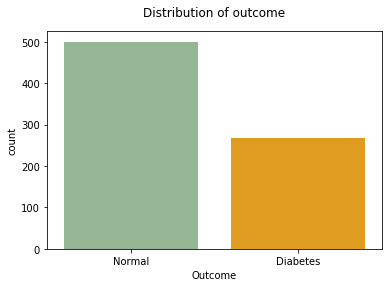

In [0]:
sns.countplot(outcome,palette=['darkseagreen','orange'])

plt.title('Distribution of outcome', pad=15)
plt.xticks([0, 1], ['Normal', 'Diabetes'])
plt.show()

As the outcome '0' is almost same as twofolds of the outcome '1'. We can say that it is unbaised data, which is proper to use.



* check for any missing value


In [0]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As you can see that some minimum values are zero although it would not be possible, there seems to be some missing values. To deal with it, we can put the mean value instead of the missing values.

In [0]:
no_data = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [0]:
def impute_zero(col):
  idx = data[data[col]==0].index
  data_without_zero = data.drop(idx)

  m = data_without_zero[col].mean()
  data[col] = data[col].replace(0,m)

In [0]:
for col in no_data:
  impute_zero(col)

In [0]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* Standardization 

Since each data of columns have different distribution chart, we have to standardize it.

In [0]:
data_dig = data.columns.drop(['Outcome'])
for column in data_dig:
  m = data[column].mean()
  std = data[column].std()
  data[column] = (data[column]-m)/std

* Train and test with KNN Classification 


In [0]:
X = data.drop(['Outcome'],axis=1)
y = data['Outcome']

In [0]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=200)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

In [0]:
search_space = {
    'n_neighbors':[3,5,7],
    'p': [1,2]
}

In [0]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(clf, search_space, cv=3, verbose=1)
gs.fit(train_X,train_y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [0]:
clf = gs.best_estimator_
predictions = clf.predict(test_X)

In [0]:
from sklearn.metrics import accuracy_score

score= accuracy_score(test_y,predictions)

In [0]:
print(score)

0.74


* Correlation between variables

 To rule out some variables that are not strongly correlated enough , we have to check the correlation between variables.

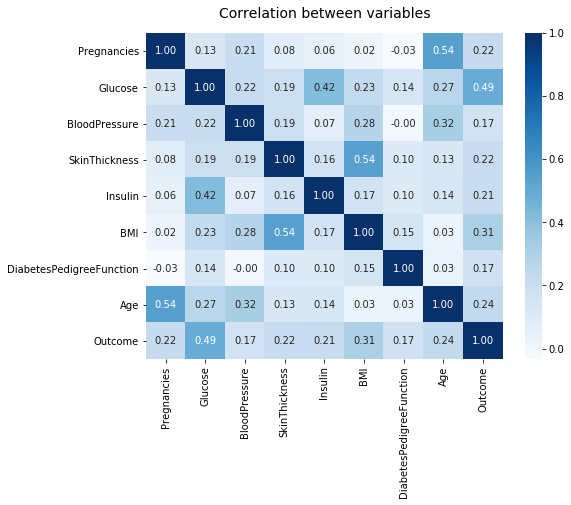

In [0]:
sns.heatmap(data.corr(), cmap='Blues' , annot=True, fmt='.2f')

plt.title('Correlation between variables', fontsize=14, pad=15)
plt.gcf().set_size_inches(8,6)
plt.show()

As you can see, bloodpressure and diabetes pedigree function are the least correlation with the outcome.

### Prediction with PCA

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA()

In [0]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
X = pd.DataFrame(pca.transform(X), columns=['PC{}'.format(i) for i in range(1, 9)])

In [0]:
X['outcome'] = y
X.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,outcome
0,1.502650,-0.587706,0.196149,0.569973,-0.455309,-0.643789,0.470317,0.260456,1
1,-1.436577,0.076938,-0.101094,-0.192771,-0.278933,0.608112,0.875734,0.101104,0
2,0.491913,-0.812039,1.652297,0.460138,-0.463510,-1.463677,-0.274657,-1.391320,1
3,-2.210587,0.118005,-0.462121,-0.595838,0.114441,0.100014,-0.002935,0.013536,0
4,0.552942,3.467060,1.971314,4.772523,-1.102183,-0.538627,0.009354,1.069128,1


In [0]:
PCA_values = pca.explained_variance_ratio_

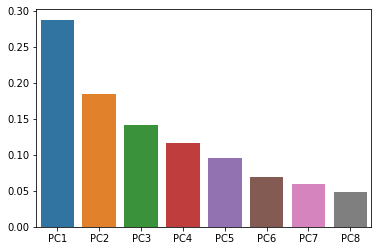

In [0]:
sns.barplot(x = X.columns.drop(['outcome']), y = PCA_values)

plt.show()

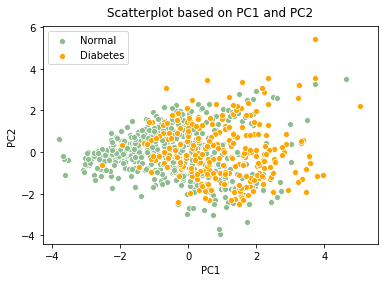

In [0]:
sns.scatterplot(X.loc[X['outcome']==0, 'PC1'], X.loc[X['outcome']==0, 'PC2'], color='darkseagreen')
sns.scatterplot(X.loc[X['outcome']==1, 'PC1'], X.loc[X['outcome']==1, 'PC2'], color='orange')

plt.title('Scatterplot based on PC1 and PC2', pad =10)
plt.legend(['Normal', 'Diabetes'])
plt.show()

In [0]:
X = X[['PC1','PC2','PC3','PC4']]

In [0]:
X.head()

,PC1,PC2,PC3,PC4
0,1.502650,-0.587706,0.196149,0.569973
1,-1.436577,0.076938,-0.101094,-0.192771
2,0.491913,-0.812039,1.652297,0.460138
3,-2.210587,0.118005,-0.462121,-0.595838
4,0.552942,3.467060,1.971314,4.772523


In [0]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=200)

In [0]:
clf = KNeighborsClassifier()

In [0]:
search_space={
    'n_neighbors':[3,5,7,9,11,13,15,17,19],
    'p':[1,2]
}

In [0]:
gs = GridSearchCV(clf, search_space, cv=3, verbose=1)
gs.fit(train_X,train_y)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [0]:
gs.best_params_

{'n_neighbors': 15, 'p': 2}

In [0]:
clf = gs.best_estimator_

In [0]:
predictions = clf.predict(test_X)

In [0]:
accuracy = accuracy_score(predictions, test_y)

In [0]:
print('accuracy = {}'.format(accuracy))

accuracy = 0.72
